# Dictionary Learning
Greatly inspired by this [sklearn example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html)

In [1]:
import os
import numpy as np
import pickle as pkl
from skimage import color
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from src.features.serialization import load_features

Read data and turn into numpy array of 0 to 1 floats

In [2]:
df = load_features()

imgs = np.stack(df["image"]) # <- currently limiting data arbitrarily because full data takes up 22GB as 64-bit floats
imgs = imgs / 255
faces = color.rgb2gray(imgs)
image_shape = faces.shape[1:]
faces = faces.reshape(faces.shape[0], -1)
faces.shape

(23705, 40000)

In [3]:
n_row, n_col = 4, 5

In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)

In [5]:
model_path = os.path.join('..', 'models', 'soeren', 'model-minibatchdictionarylearning.pkl')
with open(model_path, 'rb') as model_file:
    model = pkl.load(model_file)

/opt/homebrew/Caskroom/miniconda/base/envs/02582_case2/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MiniBatchDictionaryLearning from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/02582_case2/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/02582_case2/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: T

Extracting Components - Dictionary Learning...


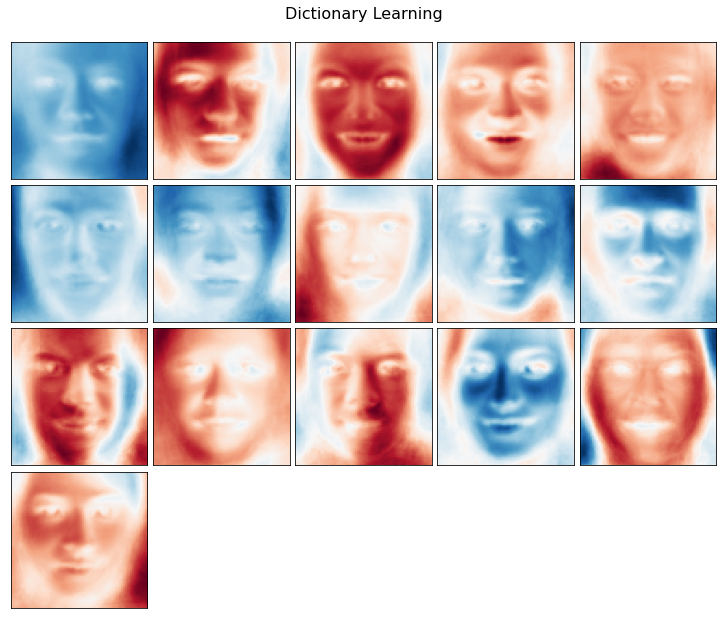

In [6]:
n_components = n_row * n_col
name = 'Dictionary Learning'

print("Extracting Components - %s..." % name)
data = faces.tolist()
components_ = model.embedder.components_
plot_gallery(name, components_[:n_components], cmap=plt.cm.RdBu)
plt.show()